# Finding the high value customers on the dataset with outliers


In [1]:
#import libraries and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#load data

df = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_merged_final.csv')

df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,7468138,18,222,61,F,3,209278.15,0,3,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
317119,7468138,18,222,61,F,3,209278.15,0,3,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
317120,7468138,18,222,61,F,3,209278.15,0,3,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
317121,7468138,18,222,61,F,3,209278.15,0,3,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [3]:
# Calculate the 75th percentile for balance and client tenure

balance_threshold = df['balance'].quantile(0.75)
tenure_threshold = df['clnt_tenure_yr'].quantile(0.75)

# Identify high-value customers based on balance and client tenure

high_value_customers = df[(df['balance'] >= balance_threshold) & (df['clnt_tenure_yr'] >= tenure_threshold)]

# Display the number of high-value customers and their summary statistics

high_value_summary = high_value_customers.describe()

high_value_summary

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,balance,calls_6_mnth,logons_6_mnth
count,3.347500e+04,33475.000000,33475.000000,33475.000000,33475.000000,3.347500e+04,33475.000000,33475.000000
mean,4.956154e+06,22.521285,275.738611,58.702196,2.699955,5.397200e+05,4.186497,7.257416
std,2.836499e+06,5.092546,61.534231,12.110732,0.775251,7.593560e+05,1.983808,1.935514
min,1.702000e+03,16.000000,192.000000,18.000000,2.000000,1.512011e+05,0.000000,3.000000
25%,2.501329e+06,19.000000,230.000000,51.000000,2.000000,2.138727e+05,3.000000,6.000000
50%,4.968571e+06,22.000000,264.000000,59.000000,3.000000,3.277182e+05,5.000000,8.000000
75%,7.355987e+06,26.000000,313.000000,67.000000,3.000000,5.734343e+05,6.000000,9.000000
max,9.999832e+06,55.000000,669.000000,93.000000,7.000000,1.632004e+07,6.000000,9.000000


### To identify high-value customers, we considered those in the top quartile for both balance and client tenure:

1.	Calculated the 75th percentile for balance and client_tenure.
2.	Filtered customers meeting both criteria.

### Age distribution of high-value customers:

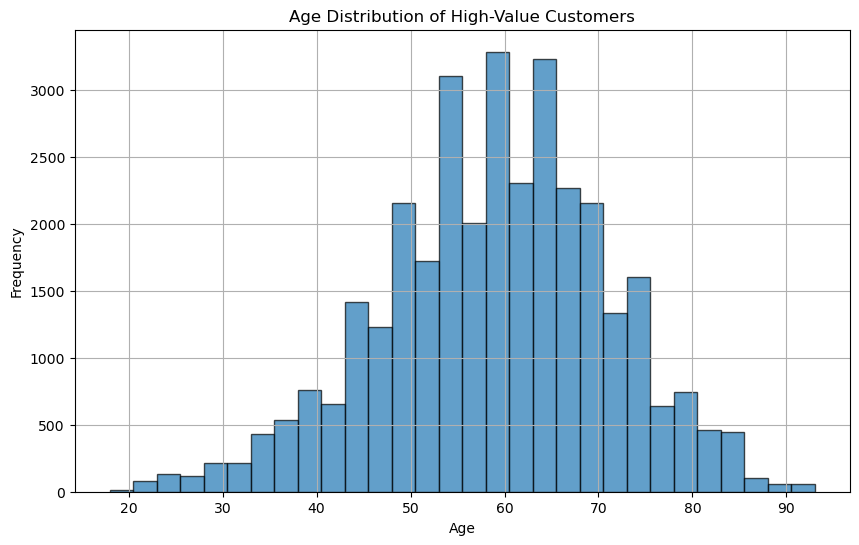

In [6]:
# Plot the age distribution for high-value customers
plt.figure(figsize=(10, 6))
plt.hist(high_value_customers['clnt_age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Age Distribution of High-Value Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Gender Distribution of high-value customers:

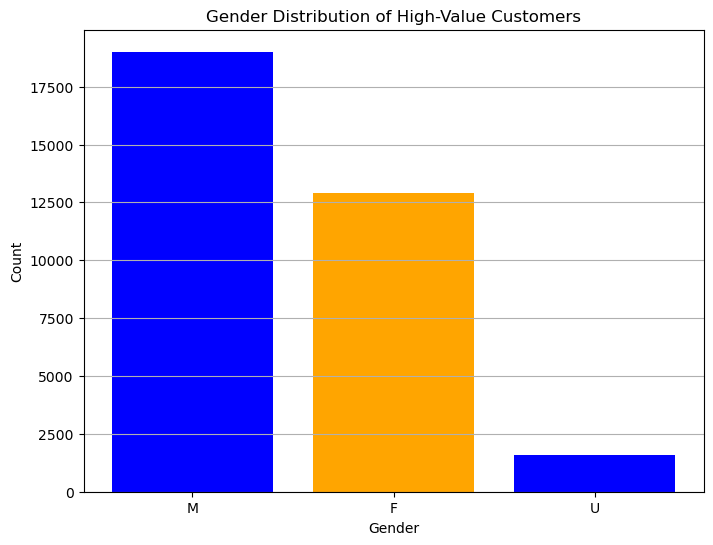

In [8]:
# Plot the gender distribution for high-value customers

gender_counts = high_value_customers['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange'])
plt.title('Gender Distribution of High-Value Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### Tenure distribution of high-value customers:

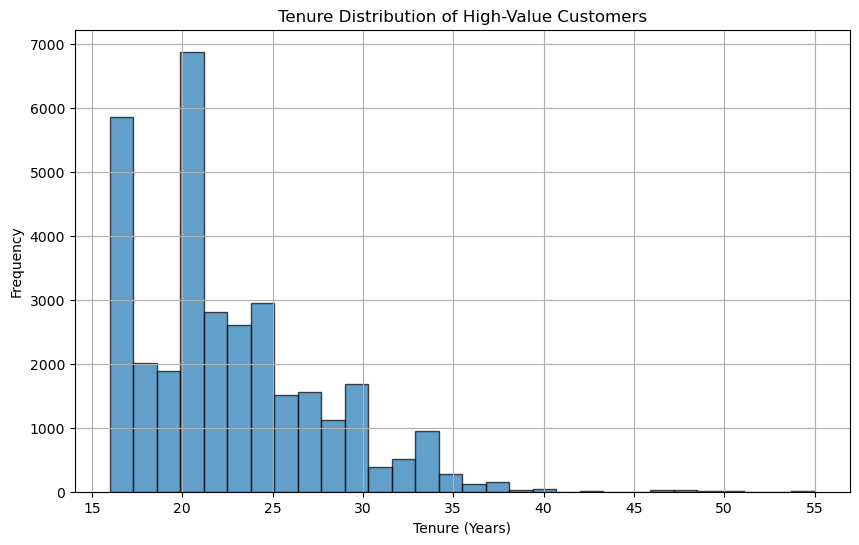

In [9]:
# Plot the tenure distribution for high-value customers

plt.figure(figsize=(10, 6))
plt.hist(high_value_customers['clnt_tenure_yr'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Tenure Distribution of High-Value Customers')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Number of accounts for high-value customers:

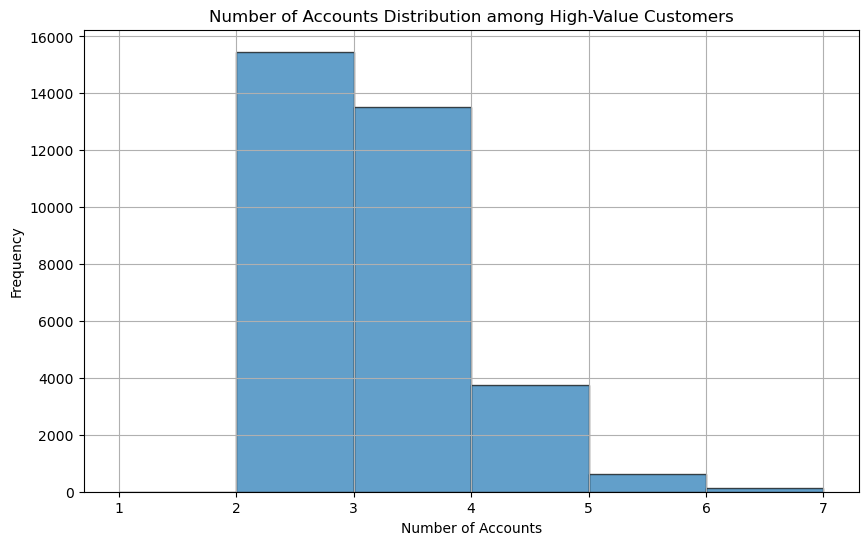

In [10]:
# Plot the distribution of the number of accounts for high-value customers

plt.figure(figsize=(10, 6))
plt.hist(high_value_customers['num_accts'], bins=range(1, high_value_customers['num_accts'].max() + 1), edgecolor='k', alpha=0.7)
plt.title('Number of Accounts Distribution among High-Value Customers')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Balance distribution of high-value customers:

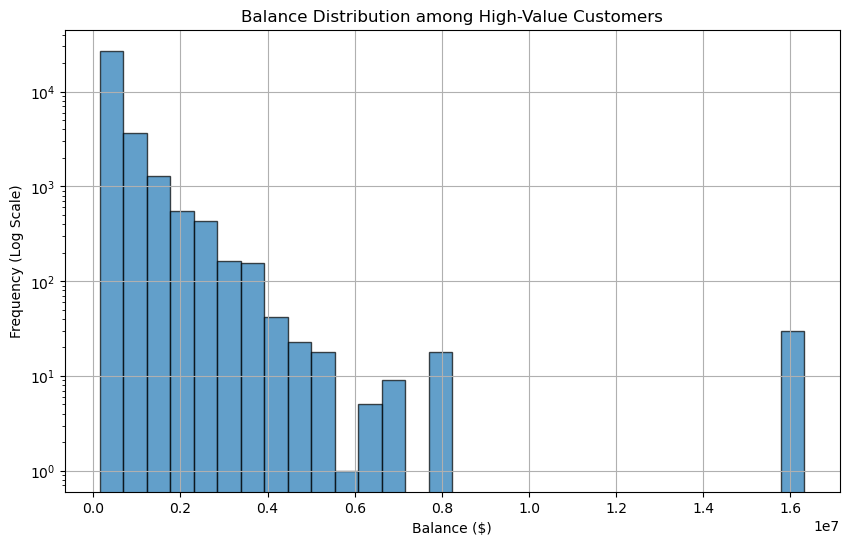

In [11]:
# Plot the balance distribution for high-value customers

plt.figure(figsize=(10, 6))
plt.hist(high_value_customers['balance'], bins=30, edgecolor='k', alpha=0.7, log=True)
plt.title('Balance Distribution among High-Value Customers')
plt.xlabel('Balance ($)')
plt.ylabel('Frequency (Log Scale)')
plt.grid(True)
plt.show()

## High value customers activity

### High-value customers calls distribution:

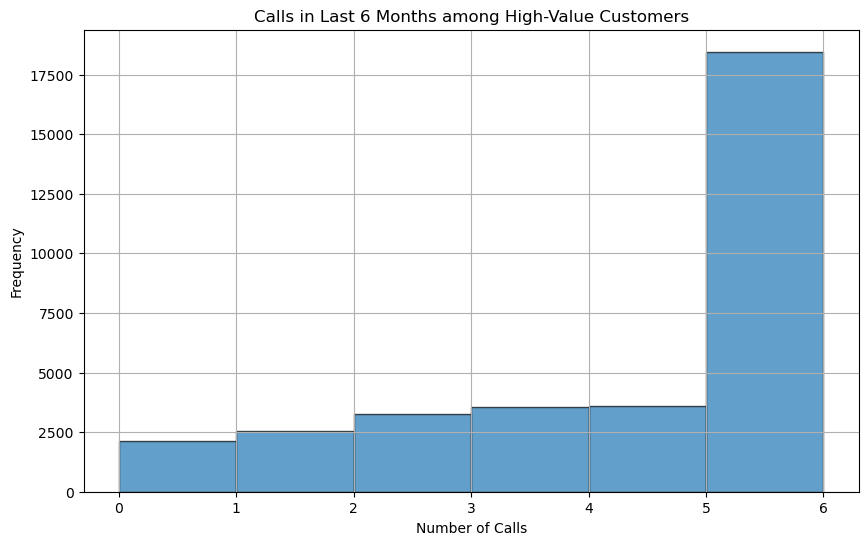

In [12]:
# Plot the distribution of calls in the last 6 months for high-value customers

plt.figure(figsize=(10, 6))
plt.hist(high_value_customers['calls_6_mnth'], bins=range(0, high_value_customers['calls_6_mnth'].max() + 1), edgecolor='k', alpha=0.7)
plt.title('Calls in Last 6 Months among High-Value Customers')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Logons distribution of high-value customers:

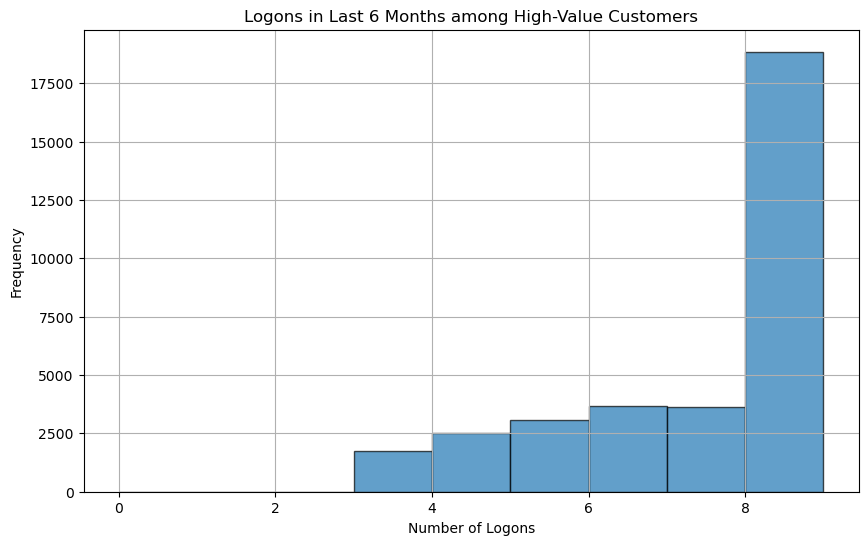

In [13]:
# Plot the distribution of logons in the last 6 months for high-value customers

plt.figure(figsize=(10, 6))
plt.hist(high_value_customers['logons_6_mnth'], bins=range(0, high_value_customers['logons_6_mnth'].max() + 1), edgecolor='k', alpha=0.7)
plt.title('Logons in Last 6 Months among High-Value Customers')
plt.xlabel('Number of Logons')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Calculate the summary statistics for high-value customers:

In [18]:
# Calculate summary statistics for high-value customers

high_value_summary_stats = {
    'Average Balance': high_value_customers['balance'].mean().round(2),
    'Average Tenure': high_value_customers['clnt_tenure_yr'].mean().astype(int),
    'Average Age': high_value_customers['clnt_age'].mean().astype(int),
    'Number of Accounts': high_value_customers['num_accts'].mean().round(1),
    'Calls in Last 6 Months': high_value_customers['calls_6_mnth'].mean().round(1),
    'Logons in Last 6 Months': high_value_customers['logons_6_mnth'].mean().round(1)
}

# Display the summary statistics for high-value customers as dataframe

high_value_summary_stats = pd.DataFrame(high_value_summary_stats, index=['High-Value Customers'])

high_value_summary_stats

,Average Balance,Average Tenure,Average Age,Number of Accounts,Calls in Last 6 Months,Logons in Last 6 Months
High-Value Customers,539720.01,22,58,2.7,4.2,7.3


### Using Robust OLS

- Using robust regression method, such as Robust OLS (Ordinary Least Squares), is a good approach when dealing with outliers. Robust regression techniques are designed to be less sensitive to outliers, providing more reliable estimates in such cases. This method can be particularly useful when outliers are not errors but valid data points that represent high-value customers.

In [21]:
# Import RLM

from statsmodels.formula.api import rlm

# Define the regression formula including both tenure in years and months

formula = 'balance ~ clnt_tenure_yr''

# Fit the Robust OLS regression model

robust_model = rlm(formula, data=high_value_customers).fit()

# Display the summary of the robust regression model

robust_model_summary = robust_model.summary()

robust_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                balance   No. Observations:                33475
Model:                            RLM   Df Residuals:                    33472
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Jul 2024                                         
Time:                        16:14:47                                         
No. Iterations:                     7                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          2.56e+05   6464.405     39.608      0.000    2.43e+05    2.69e+05
clnt_tenure_yr    2.771e+04   4450.750      6.226      0.000     1.9e+04    3.64e+04
clnt_tenure_mnth -1741.6932    368.342     -4.728      0.000   -2463.631   -1019.756
====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [23]:
# Create a total tenure variable in months
high_value_customers['total_tenure_mnth'] = high_value_customers['clnt_tenure_yr'] * 12 + high_value_customers['clnt_tenure_mnth']

# Define the regression formula using total tenure in months
formula_simplified = 'balance ~ total_tenure_mnth'

# Fit the Robust OLS regression model
robust_model_simplified = rlm(formula_simplified, data=high_value_customers).fit()

# Display the summary of the simplified robust regression model
robust_model_summary_simplified = robust_model_simplified.summary()

robust_model_summary_simplified

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_77512/1683420521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_customers['total_tenure_mnth'] = high_value_customers['clnt_tenure_yr'] * 12 + high_value_customers['clnt_tenure_mnth']


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                balance   No. Observations:                33475
Model:                            RLM   Df Residuals:                    33473
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Jul 2024                                         
Time:                        16:21:29                                         
No. Iterations:                     7                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.488e+05   6333.739     39.282      0.000    2.36e+05    2.61e+05
total_tenure_mnth   277.3655     11.319     24.505      0.000     255.181     299.550
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### Robust OLS Summary:

- Intercept: $248,800
- Total Tenure (Months): Each additional month of total tenure is associated with an increase of $277.37 in balance.

**Interpretation**

- Intercept: The expected balance for a client with zero months of tenure is $248,800. This serves as the baseline balance.

- Total Tenure (Months): There is a significant positive relationship between total tenure in months and balance. For each additional month of client tenure, the balance increases by $277.37. This positive relationship indicates that clients who have been with the company longer tend to have higher balances.

**Summary:**

- Positive Relationship: The total tenure in months has a positive and significant relationship with the balance, suggesting that longer-term clients tend to maintain higher balances.

- Simplified Model: By using total tenure in months, we avoid the multicollinearity issue and obtain a more straightforward interpretation of the relationship.

**Practical Implications:**

1.	Client Retention Strategy: This analysis reinforces the importance of retaining clients for longer periods. Each additional month a client stays with the company contributes positively to their balance.

2.	Enhanced Understanding: The simplified model provides a clearer understanding of how tenure impacts client balance without the complications of multicollinearity.


### Completion Rate comparison between high-value customers on test and control group

In [25]:
# Completion Rate comparison between high-value customers on test and control group

# Calculate the completion rate for high-value customers in Test and Control groups

completion_rate_high_value = high_value_customers.groupby('variation')['process_step'].apply(lambda x: (x == 'confirm').mean()).reset_index()

# Rename the columns for clarity

completion_rate_high_value.columns = ['Group', 'Completion Rate']

completion_rate_high_value




,Group,Completion Rate
0,Control,0.126506
1,Test,0.163087


### Interpretation

- Higher Completion Rate in Test Group: The new design appears to improve the completion rate for high-value customers, with the Test group showing a significantly higher completion rate than the Control group.
